# **Importa dados da tabela SQlite**

In [13]:
import sqlite3
import numpy

def read_data_from_database(db_file):
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    # Execute a query para selecionar os dados da tabela desejada
    cursor.execute("SELECT * FROM Monitoring")
    rows = cursor.fetchall()

    # Iterar sobre as linhas retornadas e exibir os dados
    for row in rows:
        print(row)

    # Fechar a conexão com o banco de dados
    conn.close()

# Especificar o caminho para o arquivo do banco de dados SQLite
database_file = 'Monitoring.db'

# Chamar a função para ler os dados do banco de dados
read_data_from_database(database_file)

(1, '25/11/2023 15:37:18', 'Trajetory', 6.45, 3.55, 65.62, 15.0, 0.0, 0.0)
(2, '25/11/2023 15:37:30', 'Trajetory', 7.39, 2.61, 36.31, 26.57, 65.62, 15.0)
(3, '25/11/2023 15:37:42', 'Trajetory', 9.92, 0.08, 16.36, 49.65, 36.31, 26.57)
(4, '25/11/2023 15:37:48', 'Trajetory', 11.08, -1.08, 7.29, 73.69, 16.36, 49.65)
(5, '25/11/2023 15:38:00', 'Trajetory', 11.26, -1.26, 0.0, 99.5, 7.29, 73.69)
(6, '25/11/2023 15:38:12', 'Trajetory', -0.13, 10.13, 65.62, 15.0, 0.0, 99.5)
(7, '25/11/2023 15:38:24', 'Trajetory', 7.39, 2.61, 36.31, 26.57, 65.62, 15.0)
(8, '25/11/2023 15:38:30', 'Trajetory', 9.92, 0.08, 16.36, 49.65, 36.31, 26.57)
(9, '25/11/2023 15:38:42', 'Trajetory', 11.08, -1.08, 7.29, 73.69, 16.36, 49.65)
(10, '25/11/2023 15:54:35', 'Trajetory', -1.5, 11.5, 7.29, 13.5, 7.29, 73.69)
(11, '25/11/2023 15:55:29', 'Trajetory', 9.47, 0.53, -10.92, 30.76, 7.29, 13.5)
(12, '25/11/2023 15:55:29', 'Trajetory', 10.51, -0.51, 2.08, 51.48, -10.92, 30.76)
(13, '25/11/2023 15:55:29', 'Trajetory', 11.49, 

# **Calculo de velocidade dos motores**

In [143]:
def calcular_velocidades(currentX, currentY, setpointX, setpointY, default_speed, distance_between_wheels):
    delta_x = setpointX - currentX
    delta_y = setpointY - currentY

    # Calcular a orientação do ponto alvo em relação ao robô
    theta_target = np.arctan2(delta_x,delta_y)

    # Calcular as velocidades das rodas diretamente
    left_speed = default_speed + (distance_between_wheels / 2) * theta_target/10
    right_speed = default_speed - (distance_between_wheels / 2) * theta_target/10

    return left_speed, right_speed

# **Curva Esperada**

[(5.0, 5.0), (5.0, 5.0), (5.0, 5.0), (5.0, 5.0), (5.0, 5.0)]


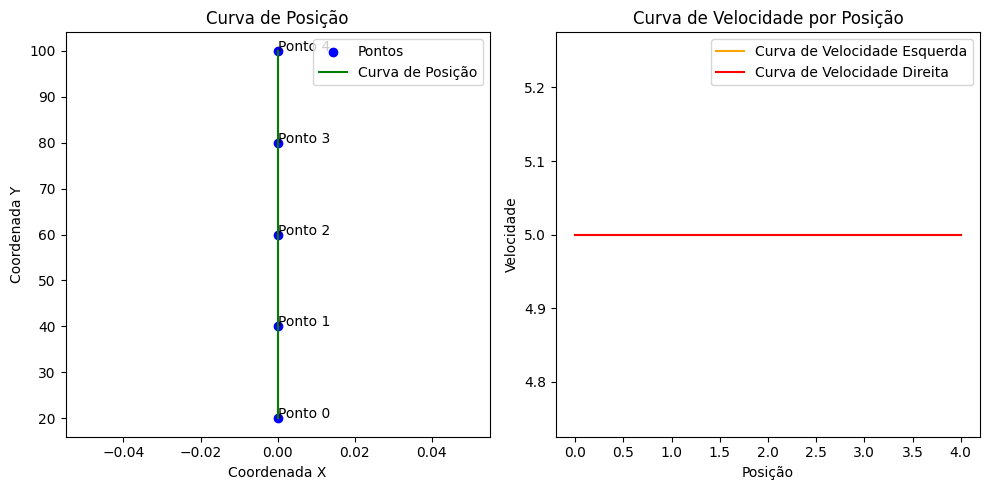

In [153]:
# Pontos almejados
x_almejados = [0, 0, 0, 0, 0]
y_almejados = [20, 40, 60, 80, 100]

# Dados de velocidade
default_speed = 5  # Velocidade padrão
distance_between_wheels = 12  # Distância entre as rodas
radius = 4.75/2
# Coordenadas iniciais (substitua pelos valores iniciais reais)
currentX = 0
currentY = 0

# Calcular as velocidades dos motores para cada ponto
velocidadesA = []
for i in range(len(x_almejados)):
    setpointX = x_almejados[i]
    setpointY = y_almejados[i]
    left_speed, right_speed = calcular_velocidades(currentX, currentY, setpointX, setpointY,default_speed, distance_between_wheels)
    velocidadesA.append((left_speed, right_speed))

print(velocidadesA)


# Interpolar curvas para posição (X e Y)
cs_x = CubicSpline(range(len(x_almejados)), x_almejados)
cs_y = CubicSpline(range(len(y_almejados)), y_almejados)

# Interpolar curvas para velocidade (Left e Right)
cs_left_speed = CubicSpline(range(len(velocidadesA)), [v[0] for v in velocidadesA])
cs_right_speed = CubicSpline(range(len(velocidadesA)), [v[1] for v in velocidadesA])

# Criar pontos intermediários para as curvas
t = np.linspace(0, len(x_almejados) - 1, 100)

# Avaliar as curvas nos pontos intermediários
x_interpA = cs_x(t)
y_interpA = cs_y(t)
left_speed_interpA = cs_left_speed(t)
right_speed_interpA = cs_right_speed(t)

# Criar dois gráficos

# Gráfico de Posição
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
scatter_plot = plt.scatter(x_almejados, y_almejados, color='blue', label='Pontos')
plt.plot(x_interpA, y_interpA, label='Curva de Posição', color='green')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Curva de Posição')
for i, txt in enumerate(range(len(x_almejados))):
    plt.annotate(f'Ponto {i}', (x_almejados[i], y_almejados[i]))
plt.legend()

# Gráfico de Velocidade
plt.subplot(1, 2, 2)
plt.plot(t, left_speed_interpA, label='Curva de Velocidade Esquerda', color='orange')
plt.plot(t, right_speed_interpA, label='Curva de Velocidade Direita', color='red')
plt.xlabel('Posição')
plt.ylabel('Velocidade')
plt.title('Curva de Velocidade por Posição')
plt.legend()

# Ajustes de layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

# **Curva Real**

[(5.320536505977729, 4.679463494022271), (4.403161163068338, 5.596838836931662), (4.849783672565273, 5.150216327434727), (5.034492703365836, 4.965507296634164), (5.0, 5.0)]


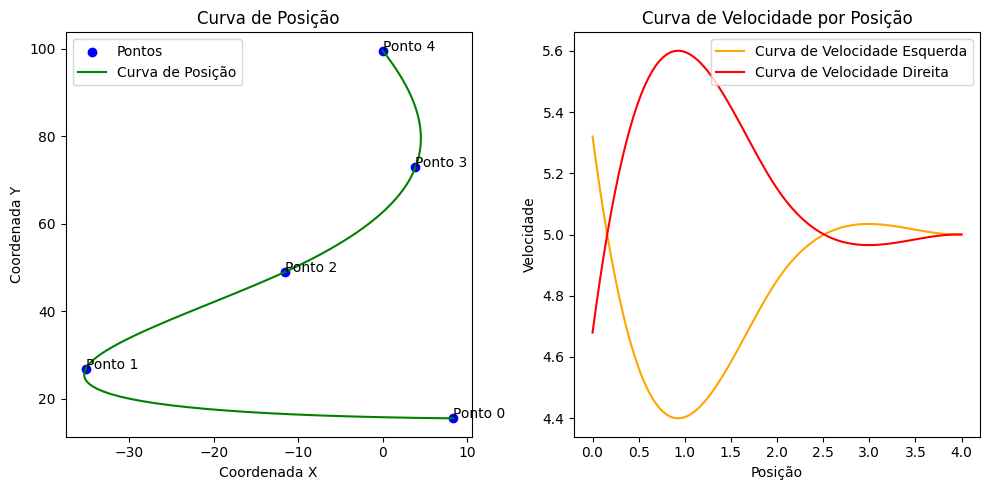

In [154]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

# Dados dos pontos
x_points = [8.33, -35.17, -11.53, 3.87, 0.00]
y_points = [15.50, 26.88, 49.00, 72.86, 99.50]

# Dados de velocidade
default_speed = 5  # Velocidade padrão
distance_between_wheels = 13  # Distância entre as rodas

# Coordenadas iniciais (substitua pelos valores iniciais reais)
currentX = 0
currentY = 0

# Calcular as velocidades dos motores para cada ponto
velocidades = []
for i in range(len(x_points)):
    setpointX = x_points[i]
    setpointY = y_points[i]
    left_speed, right_speed = calcular_velocidades(currentX, currentY, setpointX, setpointY, default_speed, distance_between_wheels)
    velocidades.append((left_speed, right_speed))

print(velocidades)

# Interpolar curvas para posição (X e Y)
cs_x = CubicSpline(range(len(x_points)), x_points)
cs_y = CubicSpline(range(len(y_points)), y_points)

# Interpolar curvas para velocidade (Left e Right)
cs_left_speed = CubicSpline(range(len(velocidades)), [v[0] for v in velocidades])
cs_right_speed = CubicSpline(range(len(velocidades)), [v[1] for v in velocidades])

# Criar pontos intermediários para as curvas
t = np.linspace(0, len(x_points) - 1, 100)

# Avaliar as curvas nos pontos intermediários
x_interp = cs_x(t)
y_interp = cs_y(t)
left_speed_interp = cs_left_speed(t)
right_speed_interp = cs_right_speed(t)

# Criar dois gráficos

# Gráfico de Posição
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
scatter_plot = plt.scatter(x_points, y_points, color='blue', label='Pontos')
plt.plot(x_interp, y_interp, label='Curva de Posição', color='green')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Curva de Posição')
for i, txt in enumerate(range(len(x_points))):
    plt.annotate(f'Ponto {i}', (x_points[i], y_points[i]))
plt.legend()

# Gráfico de Velocidade
plt.subplot(1, 2, 2)
plt.plot(t, left_speed_interp, label='Curva de Velocidade Esquerda', color='orange')
plt.plot(t, right_speed_interp, label='Curva de Velocidade Direita', color='red')
plt.xlabel('Posição')
plt.ylabel('Velocidade')
plt.title('Curva de Velocidade por Posição')
plt.legend()

# Ajustes de layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

# **Graficos de Estimado X Real**

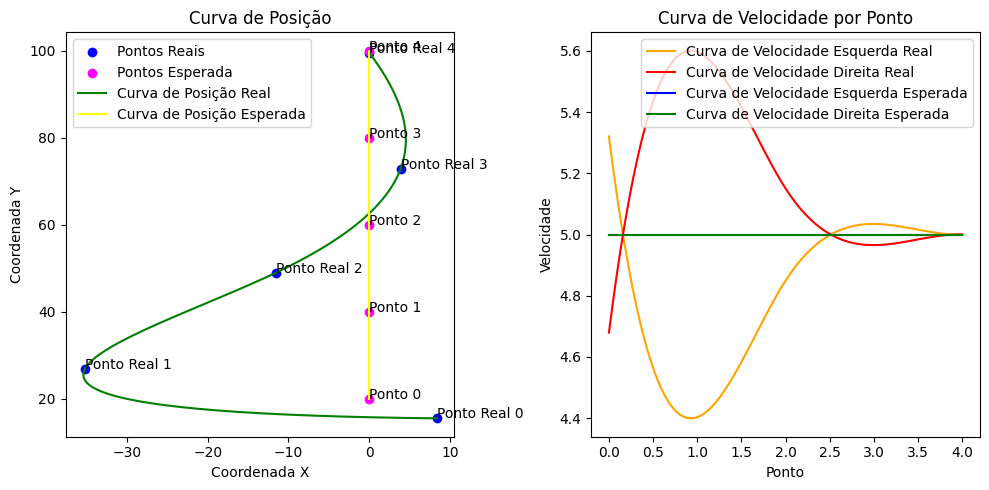

In [163]:
# Criar

# Gráfico de Posição
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
scatter_plot = plt.scatter(x_points, y_points, color='blue', label='Pontos Reais')
scatter_plot = plt.scatter(x_almejados, y_almejados, color='magenta', label='Pontos Esperada')
plt.plot(x_interp, y_interp, label='Curva de Posição Real', color='green')
plt.plot(x_interpA, y_interpA, label='Curva de Posição Esperada', color='yellow')

plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Curva de Posição')
for i, txt in enumerate(range(len(x_points))):
    plt.annotate(f'Ponto Real {i}', (x_points[i], y_points[i]))

for i, txt in enumerate(range(len(x_almejados))):
    plt.annotate(f'Ponto {i}', (x_almejados[i], y_almejados[i]))
plt.legend()

# Gráfico de Velocidade
plt.subplot(1, 2, 2)
plt.plot(t, left_speed_interp, label='Curva de Velocidade Esquerda Real', color='orange')
plt.plot(t, right_speed_interp, label='Curva de Velocidade Direita Real', color='red')
plt.plot(t, left_speed_interpA, label='Curva de Velocidade Esquerda Esperada', color='blue')
plt.plot(t, right_speed_interpA, label='Curva de Velocidade Direita Esperada', color='green')
plt.xlabel('Ponto')
plt.ylabel('Velocidade')
plt.title('Curva de Velocidade por Ponto')
plt.legend()

# Ajustes de layout
plt.tight_layout()

# Exibir os gráficos
plt.show()